**<h1> 1.  Load Data </h1>**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Mendefinisikan data path
path_data = '/content/drive/My Drive/Kuliah/dataset/'

In [3]:
# Membaca directory
import os
os.listdir(path_data)

['diabetes.csv',
 'heart.csv',
 'free_advertising_data.csv',
 'TestMatches_Dataset.csv',
 'sales.csv',
 'passenger.csv',
 'Data clean.csv',
 'passenger.gsheet',
 'retail_dataset3.csv',
 'data_retail.csv',
 'stroke.csv',
 'loan_prediction.csv']

In [4]:
# Import Packages
import pandas as pd
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

In [5]:
sample = [1, 101, 118, 107, 113, 116, 111, 121, 115, 125, 110, 109]

**<h1> 2. Deteksi Outlier </h1>**


In [6]:
print("Mead data : ", statistics.mean(sample))
print("Median data : ", statistics.median(sample))

Mead data :  103.91666666666667
Median data :  112.0


Text(0.5, 0, '[1, 101, 118, 107, 113, 116, 111, 121, 115, 125, 110, 109]')

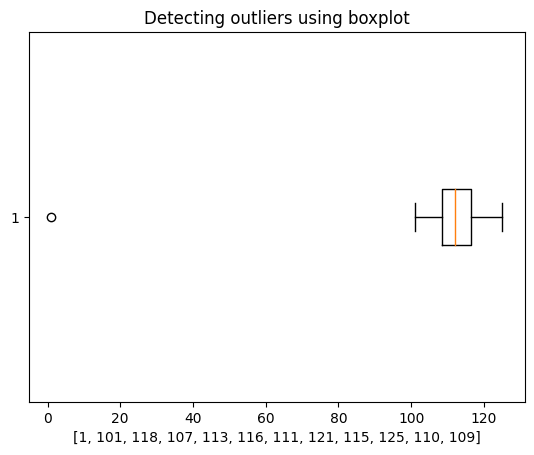

In [7]:
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using boxplot")
plt. xlabel(sample)

<function matplotlib.pyplot.show(close=None, block=None)>

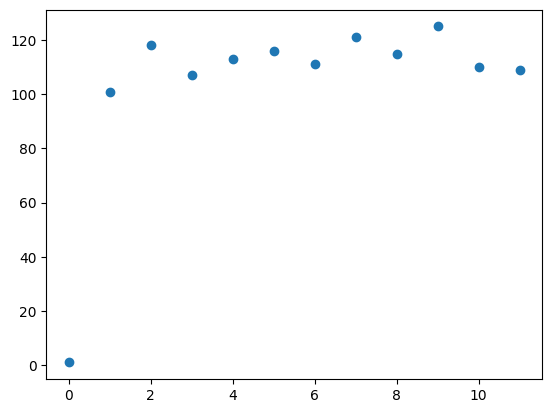

In [8]:
plt.scatter(range(0, len(sample)), sample)
plt.show

In [10]:
def detect_outliers_zscore(data):
  outliers = []
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  #print(mean, std)
  for i in data:
    z_score = (i-mean)/std
    if(np.abs(z_score)>thres):
      outliers.append(i)
  return outliers # Driver code
sample_outliers_zscore =  detect_outliers_zscore(sample)
print("Outliers from Z-scores method :", sample_outliers_zscore)

Outliers from Z-scores method [1]


In [11]:
def detect_outliers_iqr(data):
  outliers = []
  data = sorted(data)
  q1 = np.percentile(data, 75)
  q3 = np.percentile(data, 25)

  IQR = q3-q1
  lwr_bound =  q1-(1.5*IQR)
  upr_bound =  q3+(1.5*IQR)

  for i in data:
    if(i<lwr_bound or i>upr_bound):
      outliers.append(i)
      return outliers
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method :", sample_outliers)

Outliers from IQR method : [1]


**<h1> 3. Handling Outlier dengan sampling</h1>**


Cara 1 : Menghapus data oulier

In [12]:
tr = []
for j in sample:
  f = j in sample_outliers
  if f is False:
    tr.append(j)
print(tr)

[101, 118, 107, 113, 116, 111, 121, 115, 125, 110, 109]


In [13]:
print("Mean data setelah penghapusan: ", statistics.mean(tr))
print("Median data setelah penghapusan: ", statistics.median(tr))

Mean data setelah penghapusan:  113.27272727272727
Median data setelah penghapusan:  113


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

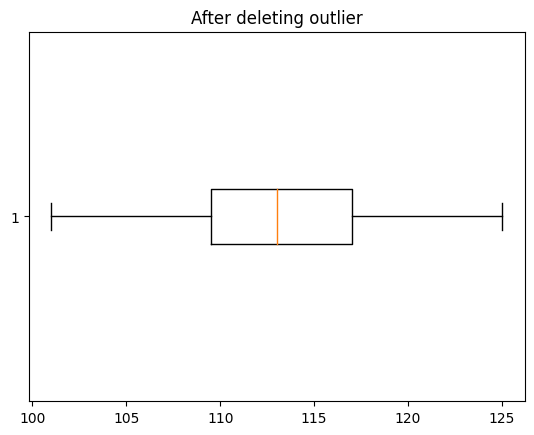

In [14]:
plt.boxplot(tr, vert=False)
plt.title('After deleting outlier')
plt.xlabel

Cara 2 : Mengganti dengan nilai batas


Titik data yang lebih kecil dari penulis ke-10 diganti dengannila persentesil ke-10 dan titik data yang lebih dari persentil ke-90 diganti dengan nilai persentil ke-90

In [15]:
# Mengganti dengan nilai persentil ke-10 dan persentil ke-90
tenth_percentil = np.percentile(sample, 10)
ninetieth_percentil = np.percentile(sample, 90)
print(tenth_percentil, ninetieth_percentil)
b = []
for k in sample:
  if k<tenth_percentil:
    k=tenth_percentil
  elif k>ninetieth_percentil:
    k=ninetieth_percentil
  else:
    k=k
  b.append(k)
print("New sample : ", b)

101.6 120.7
New sample :  [101.6, 101.6, 118, 107, 113, 116, 111, 120.7, 115, 120.7, 110, 109]


In [16]:
# Menghitung nilai mean dan median data setelah replacing batas
print("Mean data : ", statistics.mean(sample))
print("Median data : ", statistics.median(sample))
print("Mean data setelah replacing batas tertentu : ", statistics.mean(b))
print("Median data setelah replacing batas tertentu : ", statistics.median(b))

Mean data :  103.91666666666667
Median data :  112.0
Mean data setelah replacing batas tertentu :  111.96666666666667
Median data setelah replacing batas tertentu :  112.0


Text(0.5, 0, 'Sample')

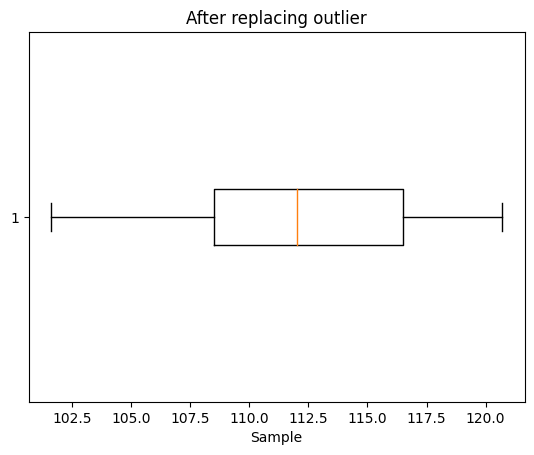

In [17]:
plt.boxplot(b, vert=False)
plt.title("After replacing outlier")
plt.xlabel("Sample")

Cara 3 : Mengganti dengan nilai median

In [18]:
# Mengganti dengan nilai median
e = []
for y in sample:
  ff = y in sample_outliers
  if ff is True:
    y=statistics.median(sample)
  else:
    y=y
  e.append(int(y))
print(e)

[112, 101, 118, 107, 113, 116, 111, 121, 115, 125, 110, 109]


In [19]:
print("Mean data setelah pengganti nilai median : ", statistics.mean(e))
print("Median data setelah pengganti nilai median : ", statistics.median(e))

Mean data setelah pengganti nilai median :  113.16666666666667
Median data setelah pengganti nilai median :  112.5


Text(0.5, 0, 'Sample')

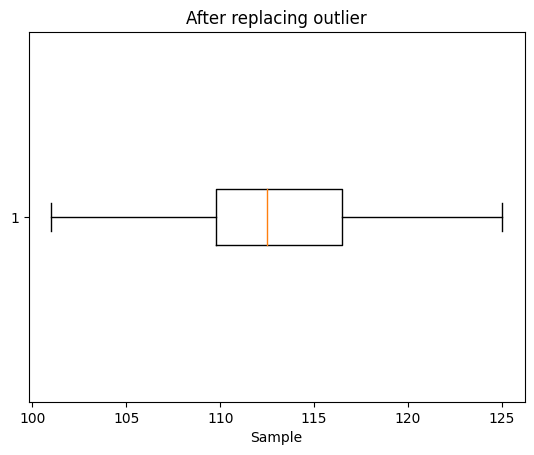

In [20]:
plt.boxplot(e, vert=False)
plt.title("After replacing outlier")
plt.xlabel("Sample")

**<h1> 4. Handling Outlier Univariat dengan Dataset</h1>**


Implementasi Handling Outlier Univariat

In [37]:
# Load dataset
df_data = pd.read_csv(path_data+'TestMatches_Dataset.csv')
df_data.head()

,MatchKey,BattingTeam,Score,Wickets,InningsResult,Overs,RPO,Lead,Inns,Result,Opposition,HostCountry,StartDate,Unnamed: 13
0,1,England,464,10,End,186.0,2.49,464,1,won,Australia,Australia,12/13/1901,NaN
1,1,Australia,168,10,End,72.1,2.33,-296,2,lost,England,Australia,12/13/1901,NaN
2,1,Australia,172,10,End,57.4,3,-124,3,lost,England,Australia,12/13/1901,NaN
3,2,Australia,112,10,End,32.1,3.49,112,1,won,England,Australia,1/1/1902,NaN
4,2,England,61,10,End,15.4,3.96,-51,2,lost,Australia,Australia,1/1/1902,NaN


In [22]:
df_data = df_data.drop(['Unnamed: 13'], axis=1)

In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8291 entries, 0 to 8290
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MatchKey       8291 non-null   int64  
 1   BattingTeam    8291 non-null   object 
 2   Score          8291 non-null   int64  
 3   Wickets        8291 non-null   int64  
 4   InningsResult  8291 non-null   object 
 5   Overs          8291 non-null   float64
 6   RPO            8291 non-null   object 
 7   Lead           8291 non-null   int64  
 8   Inns           8291 non-null   int64  
 9   Result         8291 non-null   object 
 10  Opposition     8291 non-null   object 
 11  HostCountry    8291 non-null   object 
 12  StartDate      8291 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 842.2+ KB


In [24]:
df_data.describe()

,MatchKey,Score,Wickets,Overs,Lead,Inns
count,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000,8291.000000
mean,1129.238451,273.767579,8.544084,94.452032,116.431673,2.373779
std,651.011231,135.117055,2.726067,43.713040,231.131180,1.073233
min,1.000000,0.000000,0.000000,0.000000,-702.000000,1.000000
25%,565.000000,178.000000,8.000000,63.300000,-56.000000,1.000000
50%,1133.000000,255.000000,10.000000,91.300000,116.000000,2.000000
75%,1695.000000,353.000000,10.000000,123.450000,294.000000,3.000000
max,2249.000000,952.000000,10.000000,335.200000,903.000000,4.000000


Univariate

Text(0.5, 0, 'Overs')

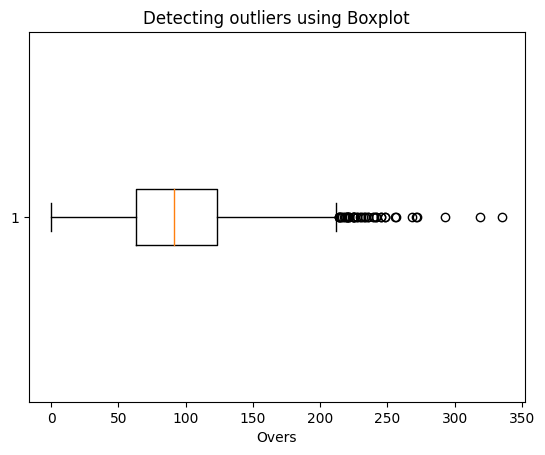

In [25]:
plt.boxplot(list(df_data.Overs), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Overs')

Dari boxplot dapat diliat bahwa ada banyak titik yang jauh dari boxplot sehingga data terdeteksi ada banyak data yang dianggap sebagai outlier

<function matplotlib.pyplot.show(close=None, block=None)>

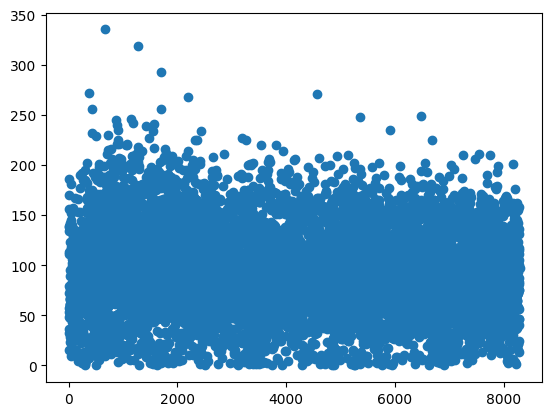

In [27]:
plt.scatter(range(0,len(list(df_data.Overs))), list(df_data.Overs))
plt.show

Dari scatter plot terdapat beberapa titik atas yang diduga sebagai outlier karena bisa dibilang jauh dari gerombolan data yang lain

In [28]:
outliers = detect_outliers_iqr(list(df_data.Overs))
print("Outliers Overs from IQR method", outliers)
print("Banyaknya outlier : ",len(outliers))

Outliers Overs from IQR method [0.0]
Banyaknya outlier :  1


Cara 1 : Deleting

In [29]:
tr = []
for j in list(df_data.Overs):
  f = j in outliers
  if f is False:
    tr.append(j)

In [30]:
print("Banyaknya data sebelum diatasi outlier : ", len(list(df_data.Overs)))
print("Banyaknya data setelah diatasi outlier : ", len(tr))

Banyaknya data sebelum diatasi outlier :  8291
Banyaknya data setelah diatasi outlier :  8290


In [31]:
#Menghitung nilai mean dan median data
print("Mean data : ", statistics.mean(list(df_data.Overs)))
print("Median data : ", statistics.median(list(df_data.Overs)))
print("Mean data setelah deleting : ", statistics.mean(tr))
print("Median data setelah deleting : ", statistics.median(tr))

Mean data :  94.45203232420697
Median data :  91.3
Mean data setelah deleting :  94.46342581423401
Median data setelah deleting :  91.3


Text(0.5, 0, 'Overs')

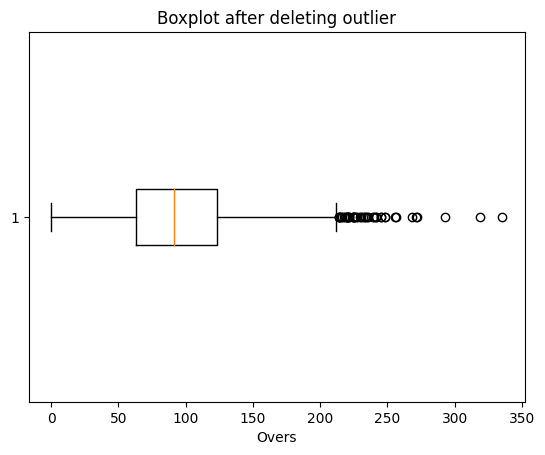

In [32]:
# Boxplot setelah penghapusan data
plt.boxplot(tr, vert=False)
plt.title("Boxplot after deleting outlier")
plt.xlabel('Overs')

Cara 2 : Replace dengan Median Data

In [33]:
e = []
for y in list(df_data.Overs):
  ff = y in outliers
  if ff is True:
    y= statistics.median(list(df_data.Overs))
  else:
    y=y
  e.append(y)

In [34]:
# Menghitung nilai mean dan median data
print("Mean data : ", statistics.mean(list(df_data.Overs)))
print("Median data : ", statistics.median(list(df_data.Overs)))
print("Mean data setelah replacing median : ", statistics.mean(e))
print("Median data setelah replacing median : ", statistics.median(e))

Mean data :  94.45203232420697
Median data :  91.3
Mean data setelah replacing median :  94.46304426486552
Median data setelah replacing median :  91.3


Text(0.5, 0, 'Overs')

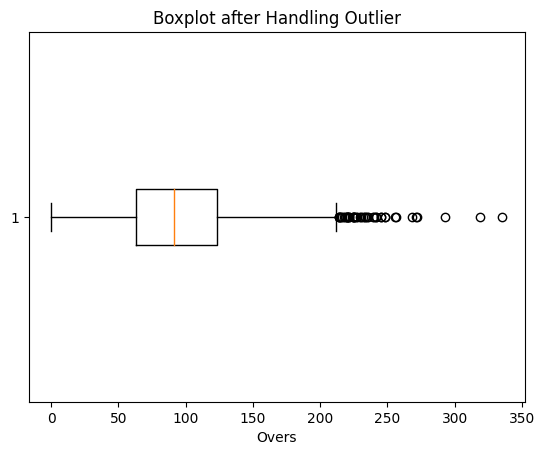

In [35]:
# Boxplot setelah replace median
plt.boxplot(e, vert=False)
plt.title("Boxplot after Handling Outlier")
plt.xlabel('Overs')

**<h1> 5. Handling Outlier Multivariat</h1>**


**<h2> Step 1</h2>**


Implementasi handling outlier multivariat

In [38]:
# load dataset
df_data = pd.read_csv(path_data+'free_advertising_data.csv')
df_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         197 non-null    float64
 1   Radio      197 non-null    float64
 2   Newspaper  197 non-null    float64
 3   Sales      197 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [40]:
df = df_data[['TV','Sales']]
df = df.to_numpy()

**<h2> Step 2</h2>**


Menghitung dengan jarak mahalanobis

In [41]:
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [42]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([ 34,  54, 126, 144, 147, 152, 172, 175]),)
--- Observasi terdeteksi sebagai outlier -----
[[290.7  17.8]
 [198.9  23.7]
 [220.3  24.7]
 [243.2  25.4]
 [280.7  16.1]
 [  4.1   3.2]
 [276.9  27. ]
 [276.7  16.8]]


**<h2> Step 3</h2>**


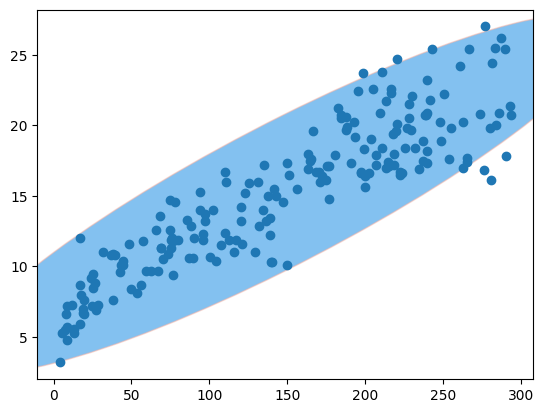

In [43]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

Perhatian: Jika Titik Biru masih ada diluar lingkaran elips maka
lakukan Step 4 dan Step 5 !!!

**<h2> Step 4 (penyelesaian masalah)</h2>**


Handling Multivariate outlier

In [45]:
remove_outlier=df[distances <= cutoff,:]

In [46]:
print("Banyaknya data asli yang masih ada outlier: ",len(df))
print("Banyaknya data setelah menghapus outlier: ",len(remove_outlier))

Banyaknya data asli yang masih ada outlier:  197
Banyaknya data setelah menghapus outlier:  189


In [47]:
df = remove_outlier
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [48]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([  2,  24,  32,  55, 148]),)
--- Observasi terdeteksi sebagai outlier -----
[[ 17.2  12. ]
 [262.9  17. ]
 [265.6  17.4]
 [210.8  23.8]
 [149.8  10.1]]


**<h2>Step 5 (cek kembali elips)</h2>**


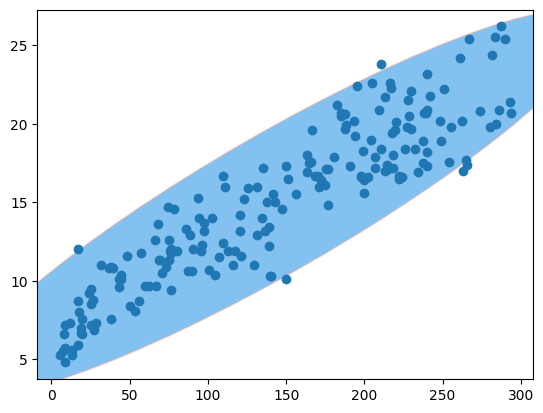

In [49]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

Masih ada outlier, kemudian dilakukan handling multivariate outlier lagi yang kedua.

#### Setelah handling multivariate outlier kedua

In [50]:
remove_outlier=df[distances <= cutoff,:]

In [51]:
print("Banyaknya data asli yang masih ada outlier: ",len(df))
print("Banyaknya data setelah menghapus outlier: ",len(remove_outlier))

Banyaknya data asli yang masih ada outlier:  189
Banyaknya data setelah menghapus outlier:  184


In [52]:
df = remove_outlier
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [53]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([121]),)
--- Observasi terdeteksi sebagai outlier -----
[[265.2  17.7]]


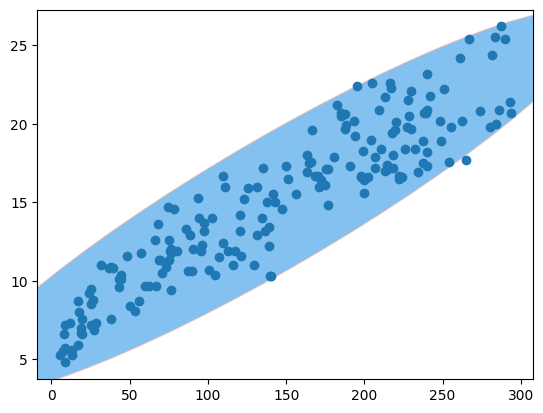

In [54]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

Ternyata masih terdeteksi outlier juga pada handling multivariat outlier yang kedua. Kemudian dilakukan handling multivariat outlier yang ketiga sebagai berikut.

#### Setelah handling multivariate outlier ketiga

In [55]:
remove_outlier=df[distances <= cutoff,:]


In [56]:
print("Banyaknya data asli yang masih ada outlier: ",len(df))
print("Banyaknya data setelah menghapus outlier: ",len(remove_outlier))

Banyaknya data asli yang masih ada outlier:  184
Banyaknya data setelah menghapus outlier:  183


In [57]:
df = remove_outlier
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)

In [58]:
# Jarak antara center point and masing-masing point observasi
distances = []
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Nilai cutoff (threshold) dari Chi-Sqaure Distribution untuk deteksi outlier
cutoff = chi2.ppf(0.95, df.shape[1])

# Index outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index Outliers ----')
print(outlierIndexes)

print('--- Observasi terdeteksi sebagai outlier -----')
print(df[ distances > cutoff , :])

--- Index Outliers ----
(array([], dtype=int64),)
--- Observasi terdeteksi sebagai outlier -----
[]


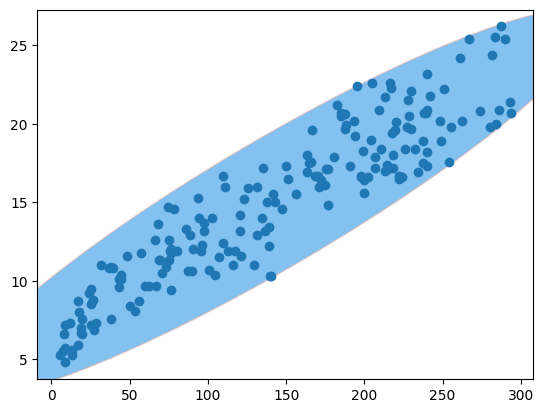

In [59]:
## ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

Sudah tidak terdeteksi adanya multivariat outlier setelah 3 kali dilakukan handling multivariat outlier.

### Latihan Yuk

Lakukan deteksi outlier pada kolom yang lain, jika ada outlier atasi dengan cara yang sudah dipelajari, bagaimana hasilnya?